# Data Meets Python 🐍 #1   
--- 
## A step-by-step guide to using Bootstrapping to calculate Confidence Intervals. Eggs included.

📝 **Author:** José Oliveira da Cruz.   
🔗 **Medium Article**: link tbd
<p>
  <a href="https://www.linkedin.com/in/josecruz-phd/" rel="nofollow noreferrer">
    <img src="https://i.stack.imgur.com/gVE0j.png" alt="linkedin"> LinkedIn
  </a> &nbsp; 
    <br>
  <a href="https://github.com/joseferncruz" rel="nofollow noreferrer">
    <img src="https://i.stack.imgur.com/tskMh.png" alt="github"> Github
  </a>
</p>




## 1. Generate some (random) data

In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Fix seed to ensure reproducibility
np.random.seed(42)

# Define some statistics to create some data
mean_egg_weight = 50
std_egg_weight = 5
n_eggs = 2_000_000

# Create the basket of eggs
eggs_basket = np.random.normal(
    loc=mean_egg_weight, 
    scale=std_egg_weight, 
    size=n_eggs
)

print(f'We have {eggs_basket.size} eggs in the basket. On average, their weight is {eggs_basket.mean():0.2f} grams, and their standard deviation is {eggs_basket.std():0.2f}.')


We have 2000000 eggs in the basket. On average, their weight is 50.00 grams, and their standard deviation is 5.00.


## 2. The Bootstrapping algorithm

In [2]:
# Define the number of rounds in the simulation
n_bootstraps = 1_000

# Create an array to store the results of the simulation
sample_means = np.empty(shape=n_bootstraps)

for i in range(n_bootstraps):
    # Sample (collect) n eggs from the basket
    sample = np.random.choice(
        eggs_basket,
        size=200,         # How many eggs we draw in each round
        replace=True     # With replacement means that after drawing each egg, we put it back in the basket
    )
    
    # Calculate the sample mean
    sample_mean = np.mean(sample)
    
    # Store the result for later
    sample_means[i] = sample_mean

# Calculate the mean and standard deviation of the sample means
mean_sample_means = np.mean(sample_means)
std_sample_means = np.std(sample_means)

print(f'In {n_bootstraps} rounds of sampling, the mean of sample means is {mean_sample_means:0.2f}, and the standard deviation is {std_sample_means:0.2f}.')


In 1000 rounds of sampling, the mean of sample means is 49.99, and the standard deviation is 0.37.


## 3. Visualize the output

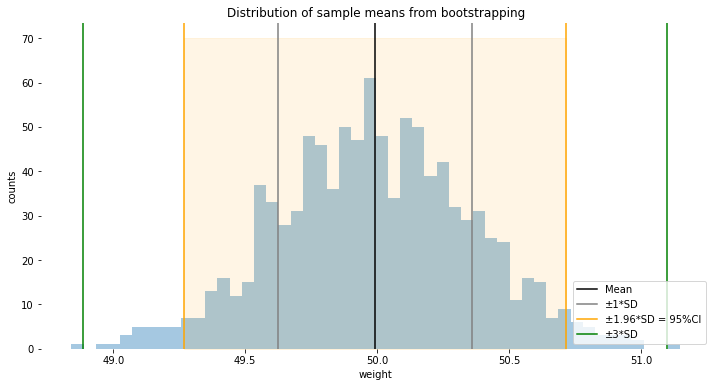

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(
    sample_means,
    bins=50,
    edgecolor='none',
    alpha=0.4
)

ax.axvline(mean_sample_means.mean(), label='Mean', color='black')

# Plot 1SD
ax.axvline(sample_means.mean() - sample_means.std(), label='±1*SD', color='grey')
ax.axvline(sample_means.mean() + sample_means.std(), label='', color='grey')

# Plot 1.96*SD
ax.axvline(sample_means.mean() - 1.96*sample_means.std(), label='±1.96*SD = 95%CI', color='orange')
ax.axvline(sample_means.mean() + 1.96*sample_means.std(), label='', color='orange')

# Plot 3*SD
ax.axvline(sample_means.mean() - 3*sample_means.std(), label='±3*SD', color='green')
ax.axvline(sample_means.mean() + 3*sample_means.std(), label='', color='green')


ax.fill_betweenx(
    [0, 70], 
    sample_means.mean() - 1.96*sample_means.std(),
    sample_means.mean() + 1.96*sample_means.std(),
    color='orange', alpha=0.1  
)

ax.set(
    xlabel='weight',
    ylabel='counts',
)

ax.set_title('Distribution of sample means from bootstrapping')


for location in ['top', 'right', 'bottom', 'left']:
    ax.spines[location].set_visible(False)

plt.legend(loc='lower right')
plt.show()


## 4. Calculate the 95% Confidence Interval

In [4]:
lower_95CI, upper_95CI = np.percentile(sample_means, [2.5, 97.5])

result = f"The 95% Confidence Interval is: {lower_95CI:.2f}, {upper_95CI:.2f}. The mean of our estimates is {sample_means.mean():.2f} grams."

print(result)

The 95% Confidence Interval is: 49.25, 50.72. The mean of our estimates is 49.99 grams.


### Thank you for following my work!

---
For more content like this, please follow me on LinkedIn 👉 [José Oliveira da Cruz, PhD](https://www.linkedin.com/in/josecruz-phd/).


❗️**Found a typo?** Sorry for the inconvenience. I've tried to catch them all, but 'to err is human.' 

Please let me know by [creating a GitHub issue](https://github.com/joseferncruz/data-meets-python/issues/new), and I will fix it as soon as possible. Thank you!
